## Classes for Pikachu and Pichu

In [30]:
from numbers import Number
class Pikachu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pikachu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
            
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width

class Pichu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    

## Fetching file and cleaning the data

In [31]:
stats_path = "../data/pikachu.txt"                      #fetching file Data for Pikachu
with open(stats_path, "r") as file:
    pikachu_stats = file.read()                         #reads in file to a string
pikachu_stats = pikachu_stats.split("\n")               #splits to every new row
pikachu_stats = pikachu_stats[1:]                       #Taking away the first row (description)

if pikachu_stats[-1] == "":                             #can be good incase the last row is empty, which it was
    pikachu_stats.pop()                                 #deletes last row if it is empty tip from GPT
pikachu_tuple = [eval(item) for item in pikachu_stats]  #using eval to take every object/row and transforming it to tuple (cordinates)

pikachu_width, pikachu_height = zip(*pikachu_tuple)     #opening up tuple and transfering it over to a x, y variable

stats_path = "../data/pichu.txt"                        #doing the same for Pichu
with open(stats_path, "r") as file:
    pichu_stats = file.read()
pichu_stats = pichu_stats.split("\n")
pichu_stats = pichu_stats[1:]

if pichu_stats[-1] == "":
    pichu_stats.pop()
pichu_tuple = [eval(item) for item in pichu_stats]

pichu_width, pichu_height = zip(*pichu_tuple)

## Plotting Pikachu and Pichu

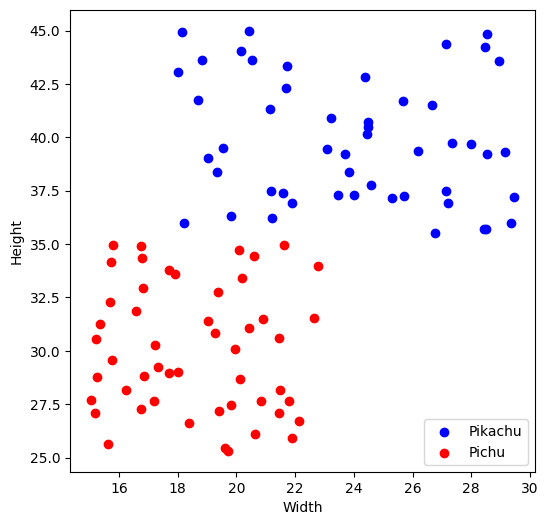

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "blue", label = "Pikachu")   #print for pinchu graf
plt.scatter(pichu_width, pichu_height, color = "red", label = "Pichu")          #print for pichu graf
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")

## Pikachu and Pichu mean dimensions

In [33]:
##Pikachu
width_sum_pikachu = 0
height_sum_pikachu = 0
i = 0
for width, height in pikachu_tuple:         #Sum pikachu dimensions
    width_sum_pikachu += width             
    height_sum_pikachu += height
    i += 1
    
width_mean_pikachu = width_sum_pikachu / i                     #Mean calculations
height_mean_pikachu = height_sum_pikachu / i

##Pichu
width_sum_pichu = 0
height_sum_pichu = 0
i = 0

for width, height in pichu_tuple:
    width_sum_pichu += width
    height_sum_pichu += height
    i += 1
    
width_mean_pichu = width_sum_pichu / i
height_mean_pichu = height_sum_pichu / i


print(f"Pikachu mean width: {width_mean_pikachu}\nPikachu mean height: {height_mean_pikachu}")
print(f"Pichu mean width: {width_mean_pichu}\nPichu mean height: {height_mean_pichu}")

Pikachu mean width: 23.945665818409296
Pikachu mean height: 39.82285079667779
Pichu mean width: 18.60547397404892
Pichu mean height: 30.084542394967194


## Adding unidentified

In [34]:
import numpy as np
unidentified_width, unidentified_height = (24, 37)
#Formula to count distance from GPT
unidentified_distance_pikachu = np.sqrt((width_mean_pikachu - unidentified_width)**2 + (height_mean_pikachu - unidentified_height)**2) 
unidentified_distance_pichu = np.sqrt((width_mean_pichu - unidentified_width)**2 + (height_mean_pichu - unidentified_height)**2)

if unidentified_distance_pikachu < unidentified_distance_pichu:             #If Pikachu distance is smaler then Pichu's
    print(f"You most likly found a Pikachu!")
elif unidentified_distance_pichu < unidentified_distance_pikachu:           #If Pichu distance is smaler then Pikachu's
    print(f"You most likly found a Pichu!")
else:
    print(F"I am unshore if you found a Pikachu or Pichu...")               #If the distance are the same

You most likly found a Pikachu!


## User interface

In [35]:
unidentified_width = float(input("Enter width of entity: "))
unidentified_height = float(input("Enter height of entity: "))


unidentified_distance_pikachu = np.sqrt((width_mean_pikachu - unidentified_width)**2 + (height_mean_pikachu - unidentified_height)**2) 
unidentified_distance_pichu = np.sqrt((width_mean_pichu - unidentified_width)**2 + (height_mean_pichu - unidentified_height)**2)

if unidentified_distance_pikachu < unidentified_distance_pichu:             #If Pikachu distance is smaler then Pichu's
    print(f"You most likly found a Pikachu!")
elif unidentified_distance_pichu < unidentified_distance_pikachu:           #If Pichu distance is smaler then Pikachu's
    print(f"You most likly found a Pichu!")
else:
    print(F"I am unshore if you found a Pikachu or Pichu...")               #If the distance are the same

You most likly found a Pikachu!


## Graf for unidentified

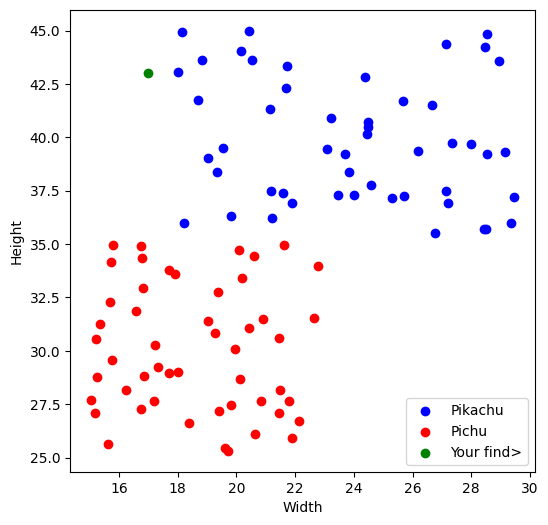

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "blue", label = "Pikachu")   #print for pinchu graf
plt.scatter(pichu_width, pichu_height, color = "red", label = "Pichu")          #print for pichu graf
plt.scatter(unidentified_width, unidentified_height, color = "green", label = "Your find>")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")